In [1]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import time

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [4]:
train_dataset = ImageFolder(root = "./Data/Cleaned Data/train", transform = transform)
test_dataset = ImageFolder(root = "./Data/Cleaned Data/val", transform = transform)

In [5]:
batch_size = 32

In [6]:
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

In [7]:
classes = {
    0: 'Cristiano Ronaldo',
    1: 'Erling Haaland',
    2: 'Kylian Mbappe',
    3: 'Lionel Messi',
    4: 'Neymar Jr'}

In [8]:
print(f"There are total {len(train_loader)} batches in our training data with each batch consisting of {batch_size} images which lead to a total of {len(train_loader) * batch_size} images")
f"There are total {len(test_loader)} batches in our training data with each batch consisting of {batch_size} images which lead to a total of {len(test_loader) * batch_size} images"

There are total 16 batches in our training data with each batch consisting of 32 images which lead to a total of 512 images


'There are total 7 batches in our training data with each batch consisting of 32 images which lead to a total of 224 images'

In [9]:
dataiter = iter(train_loader)

In [10]:
images, labels = next(dataiter)

In [11]:
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [12]:
def imshow(image, label):
    image = image / 2 + 0.5 
    image = image.numpy()
    plt.imshow(np.transpose(image, (1, 2, 0)))
    plt.axis("off")
    plt.tight_layout()
    plt.show()

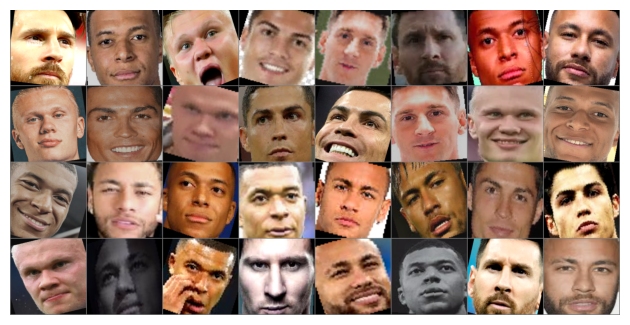

In [13]:
imshow(torchvision.utils.make_grid(images), labels)

In [14]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
    
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        
        self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1, padding = 1)
        
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, len(classes))
    
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(-1, 128 * 28 * 28)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [15]:
model = CNN().to(device)

In [24]:
epochs = 10
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()
n_total_steps = len(train_loader)

In [25]:
n_total_steps

16

In [26]:
starting_time = time.time()

for epoch in range(1, epochs + 1):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        if (i % 5) == 0:
            print(f"Epoch # {epoch} / {epochs}, step # {i} / {n_total_steps}, loss = {loss.item():.3f}")

time_taken = time.time() - starting_time
print(f'Training complete in {time_taken // 60:.0f}m {time_taken % 60:.0f}s')

Epoch # 1 / 10, step # 0 / 16, loss = 1.298
Epoch # 1 / 10, step # 5 / 16, loss = 1.444
Epoch # 1 / 10, step # 10 / 16, loss = 1.369
Epoch # 1 / 10, step # 15 / 16, loss = 1.233
Epoch # 2 / 10, step # 0 / 16, loss = 1.363
Epoch # 2 / 10, step # 5 / 16, loss = 1.171
Epoch # 2 / 10, step # 10 / 16, loss = 1.052
Epoch # 2 / 10, step # 15 / 16, loss = 1.202
Epoch # 3 / 10, step # 0 / 16, loss = 1.163
Epoch # 3 / 10, step # 5 / 16, loss = 1.172
Epoch # 3 / 10, step # 10 / 16, loss = 1.226
Epoch # 3 / 10, step # 15 / 16, loss = 1.353
Epoch # 4 / 10, step # 0 / 16, loss = 1.235
Epoch # 4 / 10, step # 5 / 16, loss = 1.110
Epoch # 4 / 10, step # 10 / 16, loss = 1.136
Epoch # 4 / 10, step # 15 / 16, loss = 1.178
Epoch # 5 / 10, step # 0 / 16, loss = 1.064
Epoch # 5 / 10, step # 5 / 16, loss = 1.276
Epoch # 5 / 10, step # 10 / 16, loss = 1.006
Epoch # 5 / 10, step # 15 / 16, loss = 0.640
Epoch # 6 / 10, step # 0 / 16, loss = 0.848
Epoch # 6 / 10, step # 5 / 16, loss = 1.173
Epoch # 6 / 10, step #

In [29]:
correct = 0
total = 0
total_predictions = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, predictions = torch.max(outputs, 1)

        for prediction in predictions:
            total_predictions.append(prediction.item())

        total += labels.size(0)
        correct += (predictions == labels).sum().item()

accuracy = (correct / total) * 100

In [30]:
f"CNN model's accuracy on test data is {accuracy:.3f}"

"CNN model's accuracy on test data is 34.673"

In [31]:
torch.save(model.state_dict(), './model/CNN_model_weights.pth')